Import module

In [2]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

Parameters

In [13]:
target_value = 2.315
tolerance = 0.001
c_lower, c_upper = -10, 10
num_points = 200000
c_value = None

$$U = \frac{2}{\sqrt{\pi}} \left(\frac{2\pi m}{h^2}\right)^{\frac{3}{2}} \int_{0}^{\infty} \omega g(\omega) \frac{1}{\exp\left(\frac{\omega - \mu}{kT}\right) - 1} \, d\omega$$



(b) According ro Figure 7.33, the correct value of $c$  when $T = 2T_c$ is approximately $-0.8$. Plug in these values and check the equation above is approximately satisfied.  

functions for integral

In [14]:
def integrand (x, c, t):
    return np.sqrt(x) / (np.exp((x-c)/t)-1)

def integral_value(c, t=2):
    result, error = quad(integrand, 0, np.inf, args=(c, t))
    return result

Plug in $c = -0.8$ and check the equation above.


In [15]:
result= integral_value(-0.8, 2)

/var/folders/jk/gd2m11nj2v52v2m2dl7k53c00000gn/T/ipykernel_87291/1282984109.py:2: RuntimeWarning: overflow encountered in exp
  return np.sqrt(x) / (np.exp((x-c)/t)-1)


In [16]:
result= integral_value(-0.8, 2)
print("Numerically obtained value of the integral is: ", integral_value(-0.8, 2))
print("Residual: ",np.abs(target_value - integral_value(-0.8, 2)))
print(f"error rate: ",(np.abs(target_value - integral_value(-0.8, 2)))/result)

Numerically obtained value of the integral is:  2.351644197605697
Residual:  0.03664419760569704
error rate:  0.015582373236140893


/var/folders/jk/gd2m11nj2v52v2m2dl7k53c00000gn/T/ipykernel_87291/1282984109.py:2: RuntimeWarning: overflow encountered in exp
  return np.sqrt(x) / (np.exp((x-c)/t)-1)


(c) Now vary $\mu$, holding $T$ fixed, to find the precise value of $\mu$ for $T = 2T_c.$ Repeat for values $T/T_c$ ranging from $1.2$ up to $3.0$, in increments of $0.2$. Plot a graph of $\mu$ as a function of temperature.

Search the precise value of $\mu$ for $T=2T_c$

In [17]:
for c in np.linspace(c_lower, c_upper, num_points): 
    if abs(integral_value(c, t=2) - target_value) < tolerance:
        c_value = c
        break

/var/folders/jk/gd2m11nj2v52v2m2dl7k53c00000gn/T/ipykernel_87291/1282984109.py:2: RuntimeWarning: overflow encountered in exp
  return np.sqrt(x) / (np.exp((x-c)/t)-1)


In [18]:
print(c_value)

-0.821354106770535


Plot a graph of $\mu$ as function of temperature $T/T_c$ ranging from $1.2$ up to $3.0$, in increments of $0.2$.

In [19]:
t_range = np.arange(1.2, 3.0+0.2, 0.2)
c_values = []

for t in t_range:
    for c in np.linspace(c_lower, c_upper, num_points):
        if abs(integral_value(c, t=t) - target_value) < tolerance:
            c_values.append(c)
            break       

/var/folders/jk/gd2m11nj2v52v2m2dl7k53c00000gn/T/ipykernel_87291/1282984109.py:2: RuntimeWarning: overflow encountered in exp
  return np.sqrt(x) / (np.exp((x-c)/t)-1)


Plot the graph

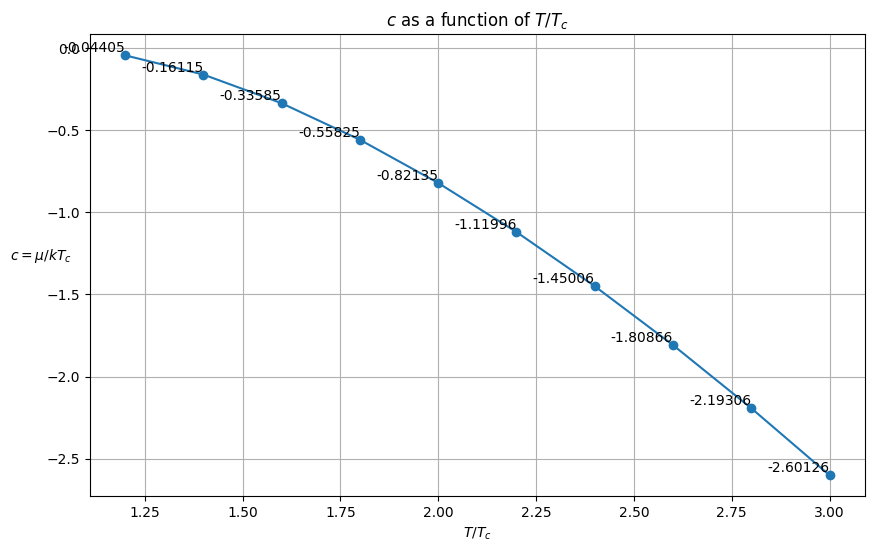

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(t_range, c_values, marker='o')

for t, mu in zip(t_range, c_values):
    plt.text(t, mu, f'{mu:.5f}', ha='right', va='bottom')
    
plt.xlabel('$T/T_c$')
plt.ylabel('$c=\mu/kT_c$', rotation=0)
plt.title('$c$ as a function of $T/T_c$')
plt.grid(True)

plt.show()